In [2]:
import numpy as np

In [3]:
#1 Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.
arr=np.random.random((10,3))
i=(np.arange(10),np.abs(arr-0.5).argmin(axis=1))
print(arr)
print(arr[i])

[[0.84065965 0.04499448 0.40200419]
 [0.15575428 0.24739587 0.9906445 ]
 [0.9772647  0.60423002 0.60695532]
 [0.64344527 0.3705429  0.03459634]
 [0.58535833 0.55146199 0.59808009]
 [0.27957405 0.0465496  0.39022378]
 [0.21931356 0.26822704 0.08222383]
 [0.10916378 0.04893771 0.02229625]
 [0.16365341 0.9576563  0.73206684]
 [0.15284475 0.18791627 0.53225619]]
[0.40200419 0.24739587 0.60423002 0.3705429  0.55146199 0.39022378
 0.26822704 0.10916378 0.73206684 0.53225619]


In [4]:
#2 Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.
arr = np.random.random((6, 6))
print(arr)
print(arr.sum(axis=1) / arr.min(axis=0))

[[0.14432785 0.18466874 0.00682435 0.45611069 0.48686181 0.79664112]
 [0.01033514 0.81709499 0.50362902 0.92298752 0.54162567 0.26078973]
 [0.42019479 0.72782733 0.51363334 0.77492585 0.70644946 0.47480554]
 [0.93966505 0.58276517 0.6097253  0.90919499 0.55974911 0.94657176]
 [0.45839663 0.60775502 0.20335272 0.18787453 0.89027343 0.34551081]
 [0.02691143 0.98822464 0.49177718 0.42637283 0.86229086 0.56755756]]
[200.81333665  16.55105299 530.13654744  24.20589669   5.5316787
  12.89596217]


In [5]:
#3 На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.
arr=np.array([6,2,0,3,0,0,5,7,0])
arr[np.where(arr[:-1] == 0)[0] + 1].max()

5

In [6]:
#4
arr1=np.ones(10)
arr2=np.array([0,1,2,3,5,5,5,8])
np.add.at(arr1,arr2,1)
print(arr1)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [7]:
#5
from collections import defaultdict
n = 4
d = defaultdict(list)
arr = np.arange(16).reshape(n, n)
for j in range(n*2-1):
    for i in range(j+1):
        temp = []
        if i < n and j - i < n: d[j].append(arr[i, j - i])
print(arr)
print(d)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
defaultdict(<class 'list'>, {0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]})


In [8]:
#6
import matplotlib.pyplot as plt

data = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]

plt.scatter(*data.T)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time ti next eruption (min)')

plt.scatter(*data.T)
plt.show()
data = (data - data.mean(axis=0)) / data.std(axis=0)

centroids = np.random.uniform(-2, 2, 4).reshape((2, 2))


#plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
#plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
#plt.title('Predicted Classes')
#plt.show()

<Figure size 640x480 with 1 Axes>

In [52]:
def get_labels(pts, centroids):
    '''Get index number of closest centroid to each item in X

    Parameters
    ----------
    pts : ndarray
        Array of points.
    centroids : ndarray
        Array of centroids.

    Returns
    -------
    res : ndarray
        Indices of closest centroids for each item in X.
    '''
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)

def solve(data, n, e):
    centroids = np.random.random((2, data.shape[1]))
    labels = get_labels(data, centroids)
    norm = norma(data, centroids, labels)
    minnm = norm
    newcen = centroids
        
    
    
    for i in range(n, -1):
        prevnm = norm
        centroids = np.array([data[labels == i].mean(axis=0) for i in range(2)])
        labels = get_labels(data, centroids)
        norm = norma(data, centroids, labels)       
        if norm < minnm:
            newcen = centroids
            minnm = norm

            
        if abs(norm - prevnm) < e:
            break
            
    return newcen

def norma(data, centroids, labels):
    ans = 0
    for i in range(centroids.shape[0]):
        ans+= abs(np.linalg.norm(data[i==labels] - centroids[i], axis=1).sum())
    return ans/data.shape[0]

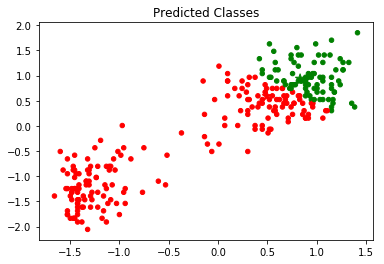

In [53]:
centroids = solve(data, 100, 1e-15)
labels = get_labels(data, centroids)
plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()